In [1]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
with open("../data/df-raw.pkl", "rb") as f:
    df = pickle.load(f)
df

,"Karjakin,Sergey","Caruana,F",Ding Liren,"Giri,A","So,W","Nakamura,Hi","Anand,V","Firouzja,Alireza","Nepomniachtchi,I","Radjabov,T"
0,"[34, 36, 31, 34, 9, 16, 11, 23, 19, 26, 18, 22...","[41, 44, 31, 41, 38, 48, 41, 51, 47, 55, 17, 2...","[32, 42, 29, 35, 28, 46, 42, 56, 41, 59, 36, 4...","[-15, -44, -28, -41, -29, -42, -30, -43, -35, ...","[None, None, None, None, None, None, None, Non...","[18, 40, 32, 48, 39, 49, 41, 53, 39, 68, 0, 27...","[-24, -29, -25, -39, -35, -50, -36, -45, -35, ...","[-27, -37, -29, -37, -27, -38, -29, -37, -13, ...","[29, 44, 36, 45, 12, 32, 11, 20, 13, 19, 3, 23...","[26, 44, 35, 54, 27, 27, 18, 23, 15, 45, 23, 2..."
1,"[-26, -41, -30, -34, -25, -46, -35, -50, -43, ...","[26, 45, 0, 7, -6, 2, -3, 9, 1, 23, 0, 0, -24,...","[23, 37, 23, 37, 15, 48, 44, 54, 41, 50, 26, 3...","[23, 19, 21, 51, 20, 32, 27, 37, 37, 42, 28, 4...","[25, 37, 24, 25, 24, 35, 12, 16, 1, 9, -6, -1,...","[-31, -40, -25, -42, -24, -32, -6, -15, 0, -27...","[-30, -40, -27, -39, -29, -40, -16, -18, -8, -...","[30, 48, 40, 43, 44, 55, 38, 44, -120, -93, -1...","[-26, -45, -33, -44, -37, -44, -36, -49, -39, ...","[21, 33, 18, 32, 20, 27, -9, 0, -13, 36, -24, ..."
2,"[31, 42, 2, 18, 8, 15, 0, 9, -3, 8, -22, 5, -3...","[27, 34, 23, 31, 26, 38, 22, 30, 30, 38, 28, 4...","[-29, -35, -29, -40, -32, -42, -36, -41, -28, ...","[-39, -27, -34, -31, -28, -20, -30, -18, -33, ...","[36, 38, 28, 35, 14, 16, 5, 18, 18, 21, 14, 25...","[29, 43, 21, 31, 17, 29, 19, 26, 16, 22, 14, 4...","[37, 44, 27, 32, 24, 32, 22, 27, 11, 24, 21, 2...","[33, 45, 36, 39, 28, 38, 29, 34, 26, 33, 29, 4...","[-25, -45, -32, -50, -38, -48, -35, -44, -38, ...","[-27, -12, -24, -1, -13, -3, -16, 6, -3, 16, 8..."
3,"[-21, -33, -24, -28, -31, -40, -34, -40, -32, ...","[-32, -36, -27, -35, -12, -17, -9, -14, -13, -...","[-26, -38, -29, -40, -31, -61, -32, -38, -29, ...","[25, 35, 4, 26, 8, 15, -2, 6, -16, 29, 11, 22,...","[29, 34, 27, 39, 27, 32, 22, 31, 23, 27, 21, 2...","[31, 34, 29, 40, 16, 18, 12, 20, 0, 24, 12, 32...","[-26, -48, -29, -36, -21, -50, -39, -52, -38, ...","[9, 37, 10, 31, 10, 48, 33, 60, 22, 57, 45, 65...","[-21, -45, -24, -33, -26, -37, -32, -48, -40, ...","[36, 46, 41, 47, 30, 36, 13, 39, 6, 26, -9, 34..."
4,"[25, 31, 31, 44, 33, 39, 27, 40, 16, 16, 8, 27...","[-29, -64, -65, -99, -89, -117, -99, -109, -49...","[24, 24, 26, 34, 28, 45, 25, 42, 18, 26, 13, 2...","[30, 45, 21, 46, 33, 40, 18, 37, 9, 16, -3, 2,...","[-30, -33, -26, -33, -16, -19, -15, -20, -12, ...","[-14, -11, -17, 2, -4, 10, 0, 16, 12, 31, 13, ...","[39, 44, 28, 37, 25, 34, 10, 24, 13, 27, 25, 3...","[-25, -38, -15, -26, -11, -29, -21, -34, -27, ...","[27, 34, 29, 41, 29, 38, 21, 40, 24, 37, 27, 3...","[17, 30, 16, 44, 29, 40, 9, 16, 17, 24, 17, 22..."
...,...,...,...,...,...,...,...,...,...,...
120,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[-32, -42, None, None, None, None, None, None,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
121,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[31, 40, 30, 42, 28, 43, 37, 42, 32, 42, 22, 4...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
122,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[Non

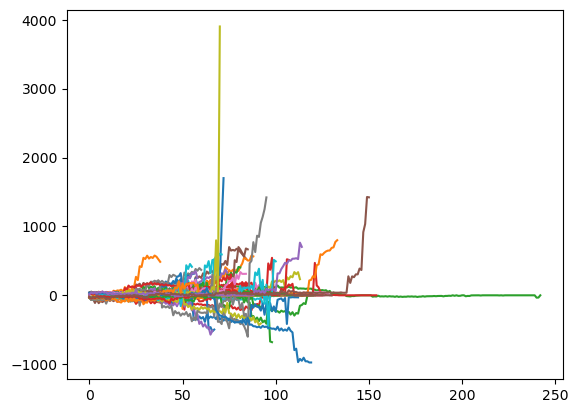

In [27]:
fig, ax = plt.subplots()

for game in df["Anand,V"]:
    sns.lineplot(game, ax=ax)

In [3]:
data_avg = {}

for opp, opp_data in df.items():
    data_avg[opp] = np.nanmean(np.array(opp_data.tolist(), dtype=float), axis=0)

/tmp/ipykernel_1375359/2117351157.py:4: RuntimeWarning: Mean of empty slice
  data_avg[opp] = np.nanmean(np.array(opp_data.tolist(), dtype=float), axis=0)


In [4]:
df_avg = pd.DataFrame(data_avg)
df_avg

,"Karjakin,Sergey","Caruana,F",Ding Liren,"Giri,A","So,W","Nakamura,Hi","Anand,V","Firouzja,Alireza","Nepomniachtchi,I","Radjabov,T"
0,-2.545455,-2.680851,-1.134328,-1.1250,-2.731959,2.524194,-1.289474,-4.878788,0.028169,1.142857
1,-3.500000,-2.500000,-1.552239,-0.9750,-4.906250,-0.258065,-4.289474,-6.848485,-2.112676,2.600000
2,-4.833333,-3.457447,-3.701493,-2.9750,-4.442105,-2.826446,-3.815789,-4.878788,-2.183099,1.800000
3,-5.060606,-6.935484,-5.492537,-2.6250,-5.547368,1.875000,-4.973684,-9.181818,-1.126761,4.371429
4,-6.696970,-10.880435,-7.388060,-5.4375,-5.947368,0.644068,-7.276316,-7.000000,-0.450704,3.600000
...,...,...,...,...,...,...,...,...,...,...
278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,NaN
279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.000000,NaN
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,NaN


In [5]:
%matplotlib qt
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
largest_score = max( -1 * df_avg.min().min(), df_avg.max().max())
largest_score *= 1.05
plt.ylim(-1 * largest_score, largest_score)

sns.lineplot(df_avg, ax=ax)
ax.axhline(0.5, linestyle='--', color='red')

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


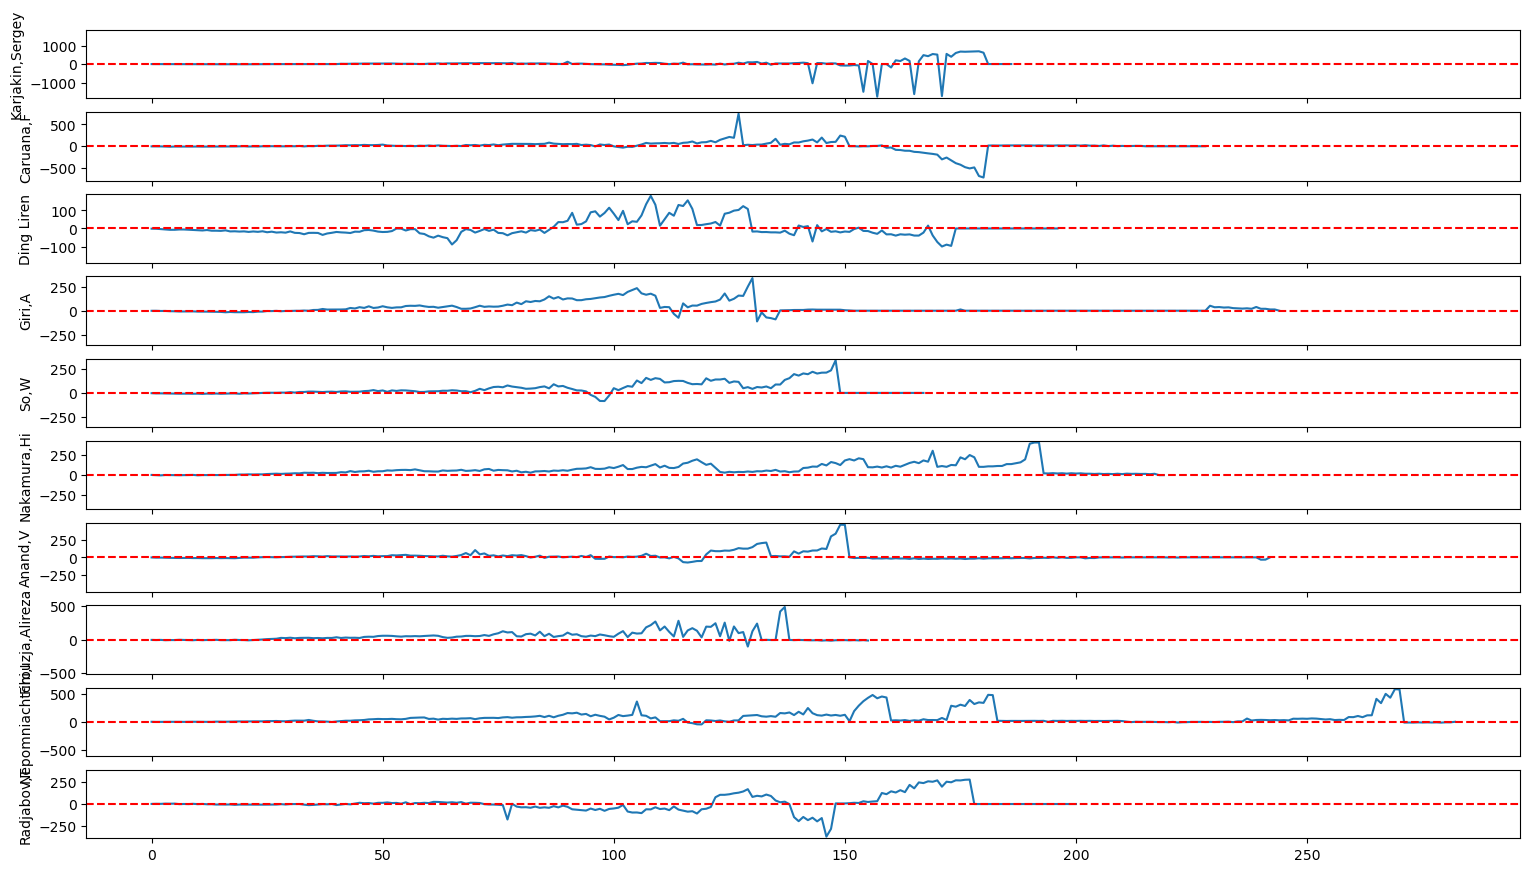

In [144]:
fig, axes = plt.subplots(10, 1, sharex=True)
fig.set_size_inches(18.5, 10.5)
most_moves = df.loc[0].apply(len).max()

for ax, opp in zip(axes, df):
    sns.lineplot(df_avg[opp], ax=ax)
    
    largest_score = max( -1 * df_avg[opp].min(), df_avg[opp].max())
    largest_score *= 1.05
    ax.set_ylim(-1 * largest_score, largest_score)
    ax.axhline(0.5, linestyle='--', color="red")

In [6]:
%matplotlib qt
fig, axes = plt.subplots(1, 10, sharey=True)
fig.set_size_inches(18.5, 10.5)
largest_score = max( -1 * df_avg.min().min(), df_avg.max().max())
largest_score *= 1.05
plt.ylim(-1 * largest_score, largest_score)

for ax, opp in zip(axes, df):
    sns.lineplot(df_avg[opp], ax=ax)